In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
class PSO():
	# PSO參數設置
    def __init__(self, pN, dim, max_iter):
        self.w = 0.8
        self.c1 = 2
        self.c2 = 2
        self.r1 = 0.6
        self.r2 = 0.3
        self.pN = pN  # 粒子數量
        self.dim = dim  # 搜索維度
        self.max_iter = max_iter  # 迭代次數
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 個體經歷的最佳位置和全局最佳位置
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每個個體的歷史最佳適應值
        self.fit = 1e10  # 全局最佳適應值
 
    #目標函数 Sphere函数
    def function(self, X):
        return X**4-2*X+3
        #return X**2-4*X+4
 
    #初始化群體
    def init_Population(self):
        for i in range(self.pN):      #因為要隨機生成pN個數據，所以需要循環pN次
            for j in range(self.dim):      #每一個維度都需要生成速度和位置，故循環dim次
                self.X[i][j] = random.uniform(0, 1)
                self.V[i][j] = random.uniform(0, 1)
            self.pbest[i] = self.X[i]     #给self.pbest定值
            tmp = self.function(self.X[i])  #得到當前最優
            self.p_fit[i] = tmp    #這個個體歷史最佳的位置
            if tmp < self.fit:   #得到現在最優和歷史最優比大小，如果現在最優大於歷史最優，則更新歷史最優
                self.fit = tmp
                self.gbest = self.X[i]
 
    # 更新粒子位置
    def iterator(self):
        fitness = []
        for t in range(self.max_iter):    #迭代次数
            for i in range(self.pN):  # 更新gbest\pbest
                temp = self.function(self.X[i])
                if temp < self.p_fit[i]:  # 更新個體最優
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if self.p_fit[i] < self.fit:  # 更新全局最優
                        self.gbest = self.X[i]
                        self.fit = self.p_fit[i]
            for i in range(self.pN):
                self.V[i] = self.w * self.V[i] + self.c1 * self.r1 * (self.pbest[i] - self.X[i]) + \
                            self.c2 * self.r2 * (self.gbest - self.X[i])
                self.X[i] = self.X[i] + self.V[i]
            fitness.append(self.fit)
            print(self.X[0], end=" ")
            print(self.fit)  # 输出最優值
        return fitness

[1.43611316] [1.03129495]
[2.2174143] 0.021885674101745245
[2.69194491] 0.0011179790779687337
[2.55670692] 0.0011179790779687337
[1.98116126] 0.0011179790779687337
[1.52072474] 0.00035489809501187963
[1.70489935] 0.00035489809501187963
[2.18375333] 0.00035489809501187963
[2.22410568] 0.0003139774302871601
[1.83111348] 1.4505343148840666e-06
[1.58131855] 1.4505343148840666e-06
[1.98271753] 1.4505343148840666e-06
[2.41063457] 1.4505343148840666e-06
[2.15563935] 1.4505343148840666e-06
[1.67200924] 1.4505343148840666e-06
[1.73832836] 1.4505343148840666e-06
[2.15566339] 1.4505343148840666e-06
[2.23100831] 1.4505343148840666e-06
[1.94983566] 1.4505343148840666e-06
[1.81845678] 1.4505343148840666e-06
[1.95857683] 1.4505343148840666e-06
[2.06967146] 1.4505343148840666e-06
[2.01180054] 9.967703471502887e-07
[2.03418166] 9.967703471502887e-07
[2.04993551] 9.967703471502887e-07
[1.98672405] 2.314215130638786e-08
[1.94330586] 2.314215130638786e-08
[2.00620107] 2.314215130638786e-08
[2.06626397] 2.

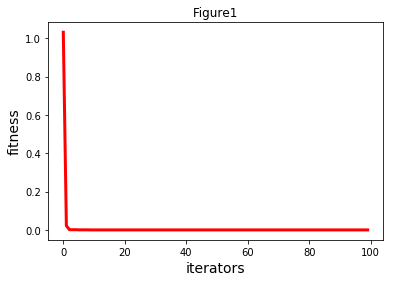

In [21]:
#執行
my_pso = PSO(pN=30, dim=1, max_iter=100)
my_pso.init_Population()
fitness = my_pso.iterator()

# 畫圖
plt.figure(1)
plt.title("Figure1")
plt.xlabel("iterators", size=14)
plt.ylabel("fitness", size=14)
t = np.array([t for t in range(0, 100)])
fitness = np.array(fitness)
plt.plot(t, fitness, color='r', linewidth=3)
plt.show()
